In [1]:
'''
Import alot of libraries, I'm sure too many for what I am doing in my modelling.
'''

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.metrics import (roc_auc_score, roc_curve, auc, accuracy_score, classification_report, 
confusion_matrix, accuracy_score)

from sklearn.model_selection import (cross_val_score, cross_val_predict, train_test_split, 
StratifiedKFold, GridSearchCV)

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, 
AdaBoostClassifier, GradientBoostingClassifier)

from sklearn.pipeline import make_pipeline, Pipeline

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests



In [2]:
'''
Download nltk packages.
'''

import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/mbp15/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mbp15/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
ls


Data Clean final.ipynb
Data Cleaning 2.ipynb
Data_Skills-master/
GA-DSI-master/
Job-Salary-Webscraping-and-Prediction-master/
Project 4 - Data Cleaning.ipynb
Project 4 - Question 1, part 1.ipynb
Project 4 - Question 1, part 2.ipynb
Project 4 - Question 2 part 2.ipynb
Project 4 - Question 2 part 3.ipynb
Project 4 - Question 2 part 4.ipynb
Project 4 - Question 2.ipynb
Project 4 web scrape #2.ipynb
Project_4_web_scrape.ipynb
README.md*
advert.csv
chromedriver/
company1
df_modelling
dollar_sign.jpg
job_linker1.csv
kisspng-united-states-dollar-dollar-sign-logo-money-dollar-vector-5b4ee367f410c6.9428988415318966799997.png
linkedin-jobs-scraper-master/
plot_forest_importances.ipynb
rawdata.csv
scrape-indeed-data-jobs-master/
seek.csv
seek3.csv
seek_clean.csv
seeker.csv
test2 - Sheet1.csv
tester - Sheet1.csv
web scrape #3.ipynb


In [4]:
'''
Read in the cleaned data frame.
'''

df = pd.read_csv('./df_modelling', index_col = 0)


In [5]:
df


,job_title,job_location,advertiser,url,job_post_date,job_desc,pay_total2,jbd,salary
0,data scientist,Sydney,Motion Recruitment,www.seek.com.au/job/38274601?type=standout&sea...,23 Jan 2019,ABOUT QHR/eQ8 year of providing consulting...,120999.45,Normal Data Scientist,0.0
1,data science delivery lead,Sydney,Intellify,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...,165000.00,Senior Data Scientist,1.0
2,head of data science engineering & products,Sydney,FIRESOFT Consulting,www.seek.com.au/job/38248336?type=standard&sea...,1 Feb 2019,Head of Data Science Engineering & Products - ...,120999.45,Normal Data Scientist,0.0
3,machine learning engineer / scientist - optimi...,Sydney,Infopeople,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...,160000.00,Senior Data Scientist,1.0
4,data analytics & data science team leader,Sydney,AUSTRALIAN FEDERAL POLICE,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...,115046.50,Senior Data Scientist,0.0
5,senior data science executive,Sydney,The Nielsen Company (Australia) Pty Ltd,www.seek.com.au/job/38257609?type=standout&sea...,4 Feb 2019,Nielsen is a global performance management com...,140000.00,Senior Data Scientist,0.0
6,junior data scientist,Sydney,Motion Recruitment,www.seek.com.au/job/38108166?type=standout&sea...,15 Jan 2019,About the business and the role My client is ...,120999.45,Normal Data Scientist,0.0
7,data scientist with consultancy experience,Sydney,360HR Pty Ltd,www.seek.com.au/job/38261034?type=standard&sea...,4 Feb 2019,"In this role, you will be managing data from m...",120999.45,Normal Data Scientist,0.0
8,senior data science (loyalty) :: $170k + super...,Sydney,Correlate Resources,www.seek.com.au/job/38153321?type=standout&sea...,21 Jan 2019,Senior Data Scientist (Loyalty) :: $170K + Sup...,187000.00,Senior Data Scientist,1.0
9,senior data scientist,Sydney,Preacta Recruitment,www.seek.com.au/job/38265180?type=standard&sea...,5 Feb 2019,Currently working for one of Australia’s leadi...,140000.00,Senior Data Scientist,0.0


In [6]:
df.job_location.value_counts()


Sydney    1803
Name: job_location, dtype: int64

In [7]:
'''
Remove symbols from job descriptions.
'''

df.job_desc = df.job_desc.str.replace(',', '')
df.job_desc = df.job_desc.str.replace('$', '')
df.job_desc = df.job_desc.str.replace('-', '')
df.job_desc = df.job_desc.str.replace('’', '')
df.job_desc = df.job_desc.str.replace('/', '')
df.job_desc = df.job_desc.str.replace('+', '')
df.job_desc = df.job_desc.str.replace('&', '')
df.job_desc = df.job_desc.str.replace("'", '')
df.job_desc = df.job_desc.str.replace('@', '')
df.job_desc = df.job_desc.str.replace(';', '')
df.job_desc = df.job_desc.str.replace('%', '')
df.job_desc = df.job_desc.str.replace('•', '')
df.job_desc = df.job_desc.str.replace('!', '')
df.job_desc = df.job_desc.str.replace('#', '')
df.job_desc = df.job_desc.str.replace(':', '')
df.job_desc = df.job_desc.str.replace('(', '')
df.job_desc = df.job_desc.str.replace(')', '')
df.job_desc = df.job_desc.str.replace('.', '')

In [8]:
'''
Set X as job_description.
'''

X = df['job_desc']


In [9]:
'''
Set y as the salary column (high and low). The train, test split the data.
'''

y = df['salary']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [11]:
'''
Load stopwords.
'''

stop = stopwords.words('english')

In [12]:
'''
Create Lemmatize tokenizer function. This is required for pipelining in next step.
'''

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [14]:
'''
Pipeline modelling with logistic regression.
'''

model = Pipeline(
                steps = [('tfidf', TfidfVectorizer(tokenizer=LemmaTokenizer(), 
                                                   ngram_range=(1,2),  
                                                   stop_words=stop, 
                                                   max_features=100)),
                         ('lr', LogisticRegression(solver='liblinear'))],
                      )
                          
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(model.steps[0][1].get_feature_names()))

# features = model.steps[0][1].get_feature_names()
# print(features)
                          

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0.8170055452865065
Number of features: 100


In [21]:
'''
Pipeline modelling using Random Forest Classifier. Return feature importance for works in job_description.
'''

model2 = Pipeline(
                steps = [('tfidf', TfidfVectorizer(tokenizer=LemmaTokenizer(), 
                                                   ngram_range=(1,2),
                                                   stop_words=stop, 
                                                   max_features=200,
                                                   max_df = 0.5,
                                                   sublinear_tf = True)), 
                          ('rfc', RandomForestClassifier(n_estimators=250,
                                                         random_state=42))]
                      )

model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("Number of features:", len(model2.steps[0][1].get_feature_names()))

feature_importances = pd.DataFrame(model2.steps[1][1].feature_importances_, model2.steps[0][1].get_feature_names()).reset_index()
feature_importances.columns = ['feature', 'importance']
features = feature_importances.sort_values('importance', ascending=False)

0.8188539741219963
Number of features: 200


In [22]:
'''
Top features after removing stopwords.
'''

features.sort_values('importance', ascending=False).head(20)


,feature,importance
18,business analyst,0.017807
143,program,0.016511
1,agile,0.015022
171,stakeholder,0.013498
33,contract,0.012624
3,analyst,0.012241
75,government,0.011249
181,technical,0.010546
121,multiple,0.010006
36,customer,0.009965


In [35]:
'''
List to extend stopwords.
'''

stop.extend(['month', 'big', 'demonstrated', 'requirement', 'document', "$", "'d", "'ll", "'re", "'s", 
             "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would', 
             'process', 'like', 'delivery', 'button', ', please', 'please', 'contact', "+", 'current', 
             'people', 'australia', 'u', 'across', 'mulitple', 'responsibility', 'transformation', 'cbd', 'use',
             'using', 'need', 'seen', 'term', 'able', 'role :', 'he', 'part', 'job', 'day', 'one', 'end',
             ',', ':', 'role', 'life', 'want', 'sale', 'way', 'risk', 'make', 'all that', 'good', 'get', 'review',
             'full', 'time', 'area', '?', 'end', 'job', 'risk', 'way', 'u', 'sale', 'time', 'group', 'commercial',
             'etc'])


In [36]:
'''
Place top features into dictionary for subsequent wordcloud.
'''

frequencies = pd.Series(data = features.importance.values,index=features.feature).to_dict()

In [37]:
'''
Confirm in dictionary.
'''

for k,v in frequencies.items():
    print(k)

business analyst
program
agile
stakeholder
contract
analyst
government
technical
multiple
customer
plan
engineer
system
test
support
financial service
client
application
senior
communication
career
within
platform
sql
change
leading
intelligence
join
organisation
large
tool
documentation
delivering
also
solution
industry
employee
understand
quality
new
lead
functional
user
developing
technology
understanding
ensure
testing
provide
recruitment
based
including
complex
meet
information
sydney
engineering
background
high
knowledge
key
software
design
cloud
experience working
analytics
successful
etc
looking
growth
model
modelling
financial
reporting
position
existing
building
product
company
following
manager
develop
partner
candidate
innovative
market
drive
help
responsible
required
highly
focused
skill experience
year experience
infrastructure
marketing
include
problem
communication skill
create
seeking
future
value
managing
best
insight
analytical
exciting
strategic
degree
providing
rep

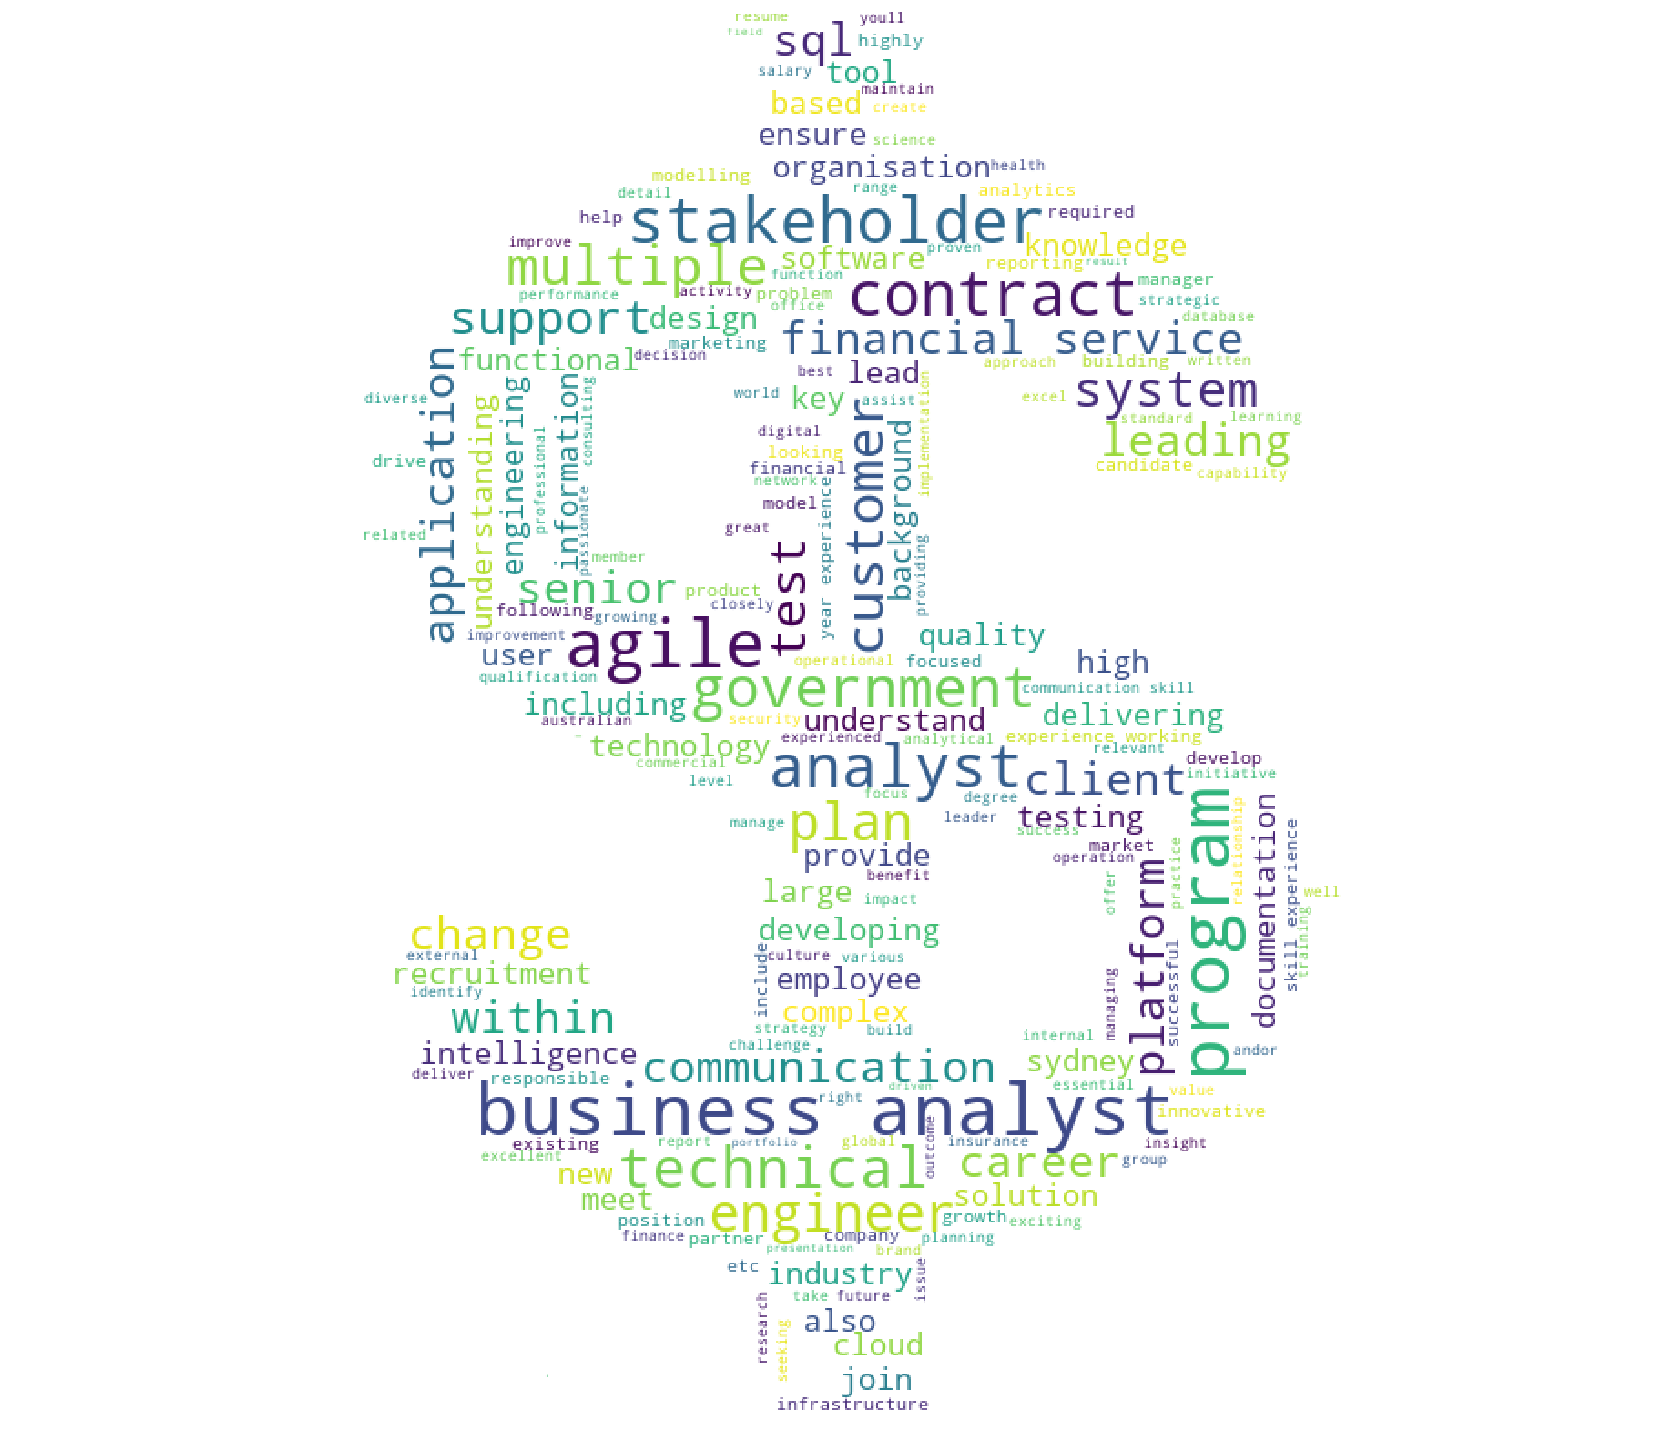

In [40]:
'''
Create custom wordcloud on mask of dollar sign.
'''

words = frequencies
mask = np.array(Image.open('./dollar_sign.jpg'))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 1200, height = 1200, background_color='white',
                           stopwords=stop, mask=mask).generate_from_frequencies(words)
    plt.figure(figsize=(40,20),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)
